# Design and Implementation of a Diabetic Disease Identification Algorithm Based on Data Mining
> This one developed as part of a Master's thesis project at Northeastern University, China. The project is supervised by Professor Chen Dongming.

<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Getting Started </span></b> </div>

<br>

### <b>I <span style='color:#16C2D5'>|</span> Import libraries</b> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

### <b>II <span style='color:#16C2D5'>|</span> Input the data</b> 

In [6]:
df = pd.read_csv('diabetes_prediction_dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# <span style="color:#E888BB; font-size: 1%;">1 | EXPLORATORY DATA ANALYSIS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>1 | EXPLORATORY DATA ANALYSIS </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Handling Duplicates</b> 

In [10]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [11]:
df = df.drop_duplicates()

### <b>II <span style='color:#16C2D5'>|</span> Uniqueness</b> 

In [12]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


### <b>III <span style='color:#16C2D5'>|</span> Missing Values</b> 

In [13]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [14]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

### <b>IV <span style='color:#16C2D5'>|</span> Describe the Data</b> 

In [15]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [18]:
df.describe().transpose().style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
age,96128.00,41.80,22.46,0.08,24.00,43.00,59.00,80.00
hypertension,96128.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
heart_disease,96128.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
bmi,96128.00,27.32,6.77,10.01,23.40,27.32,29.86,95.69
HbA1c_level,96128.00,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,96128.00,138.22,40.91,80.00,100.00,140.00,159.00,300.00
diabetes,96128.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Univariate Analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Histogram for age</b> 

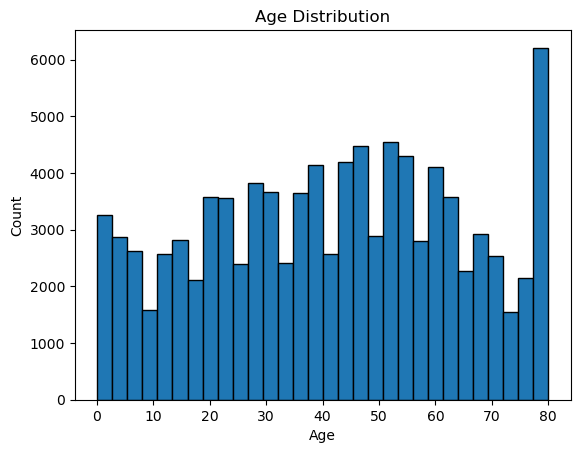

In [17]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Bar plot for gender</b> 

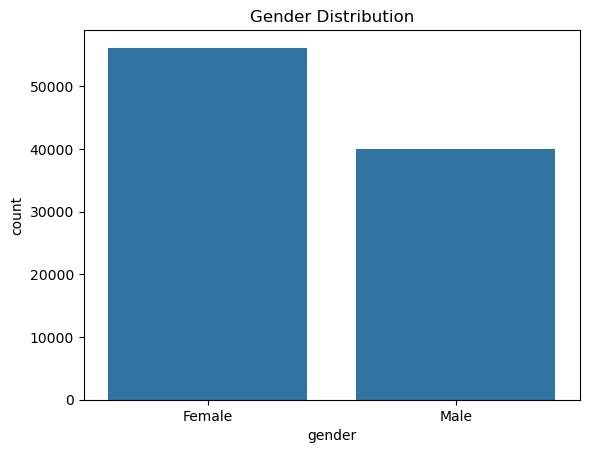

In [19]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

### <b>III <span style='color:#16C2D5'> | </span> Distribution plot for BMI</b> 

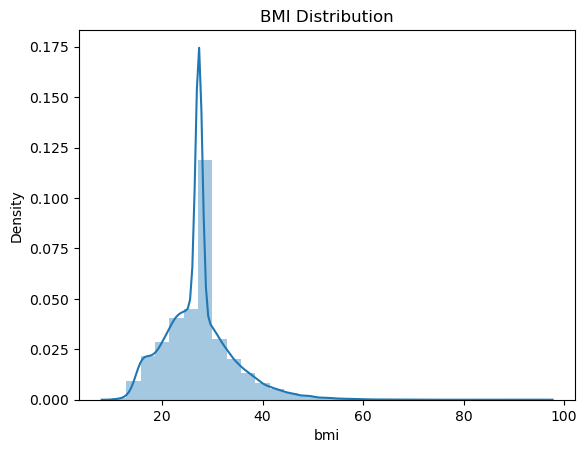

In [20]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Count plots for binary variables</b> 

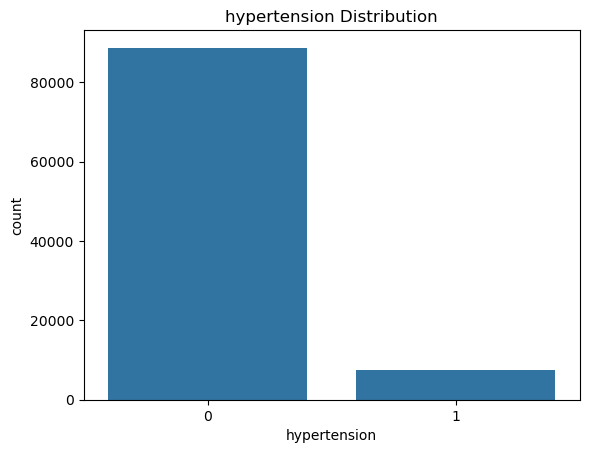

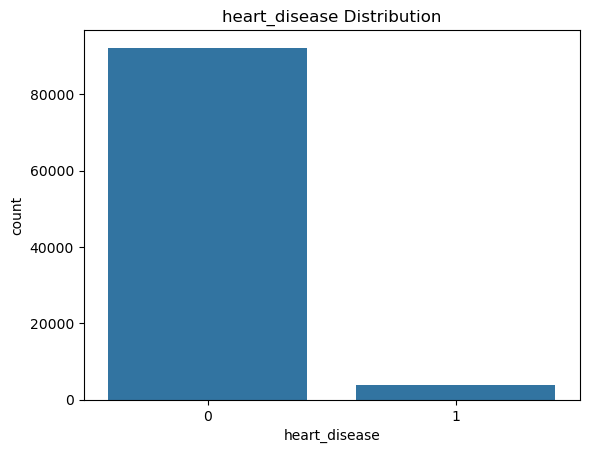

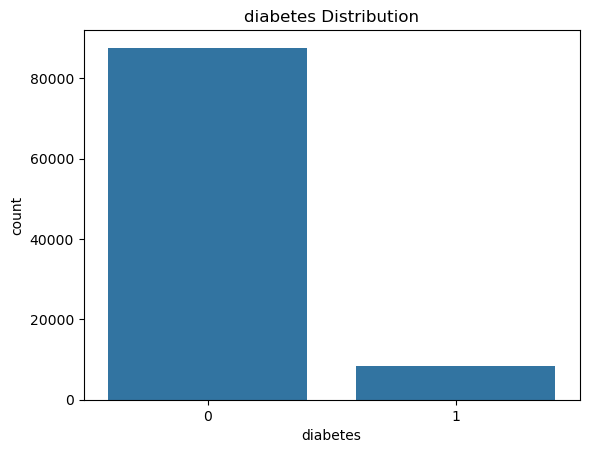

In [21]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Count plot for smoking history</b> 

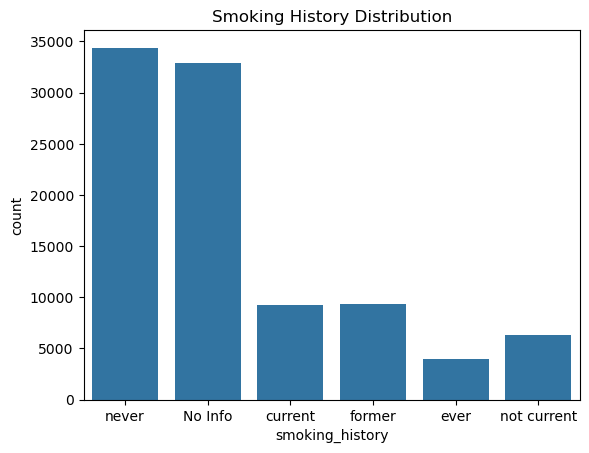

In [22]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3.Bivariative Analysis</span></b> </div>
### <b>I <span style='color:#16C2D5'>|</span> Boxplot BMI vs Diabetes classification</b> 

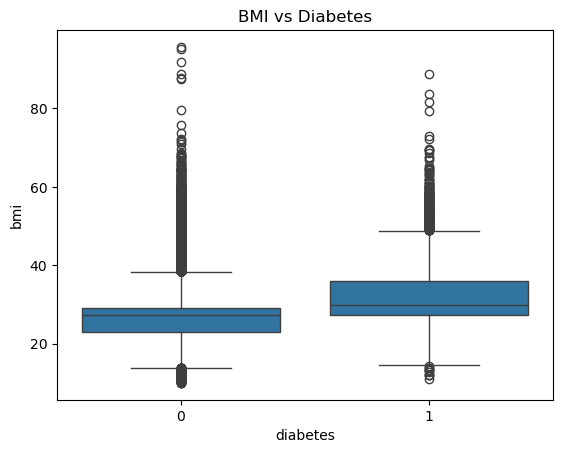

In [23]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Boxplot Age vs Diabetes classification</b> 

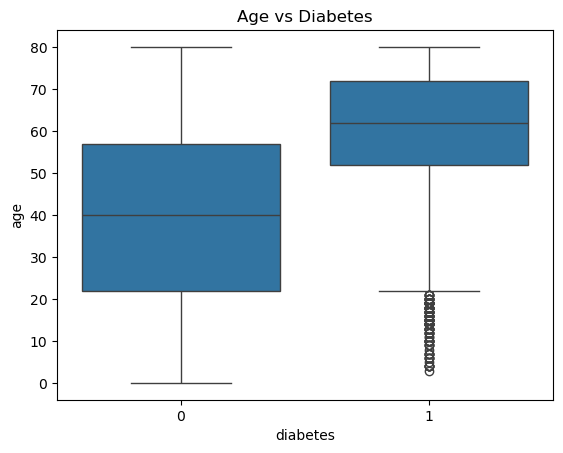

In [24]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Count plot of gender vs diabetes</b> 

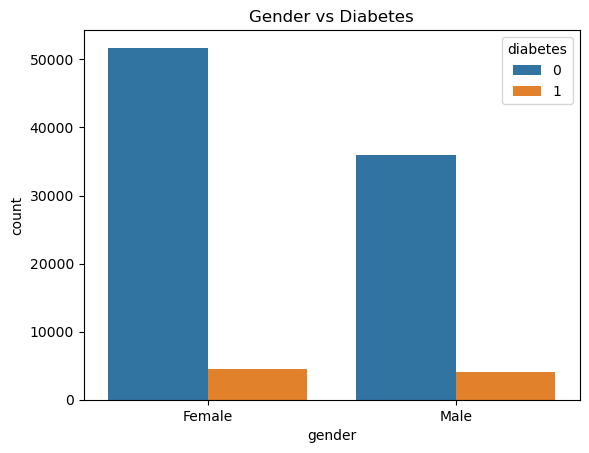

In [25]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Boxplot HbA1c level vs Diabetes classification</b> 

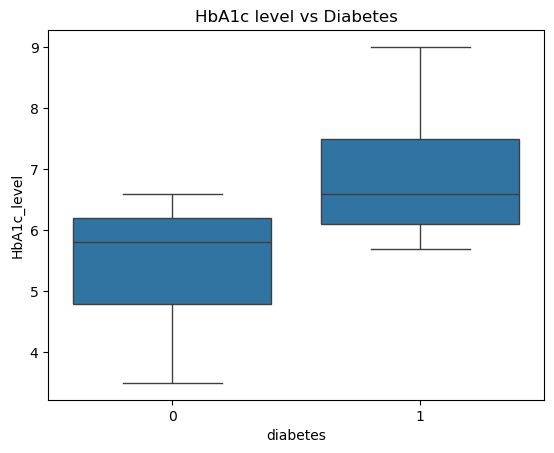

In [26]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Boxplot blood glucose level vs Diabetes classification</b> 

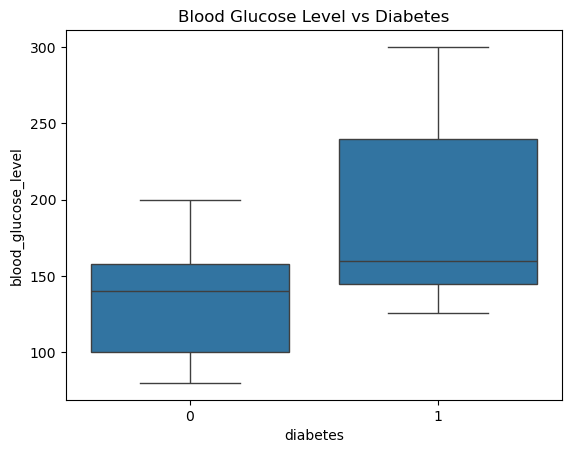

In [28]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

### <b>V <span style='color:#16C2D5'>|</span> Pair plot for numeric features</b> 

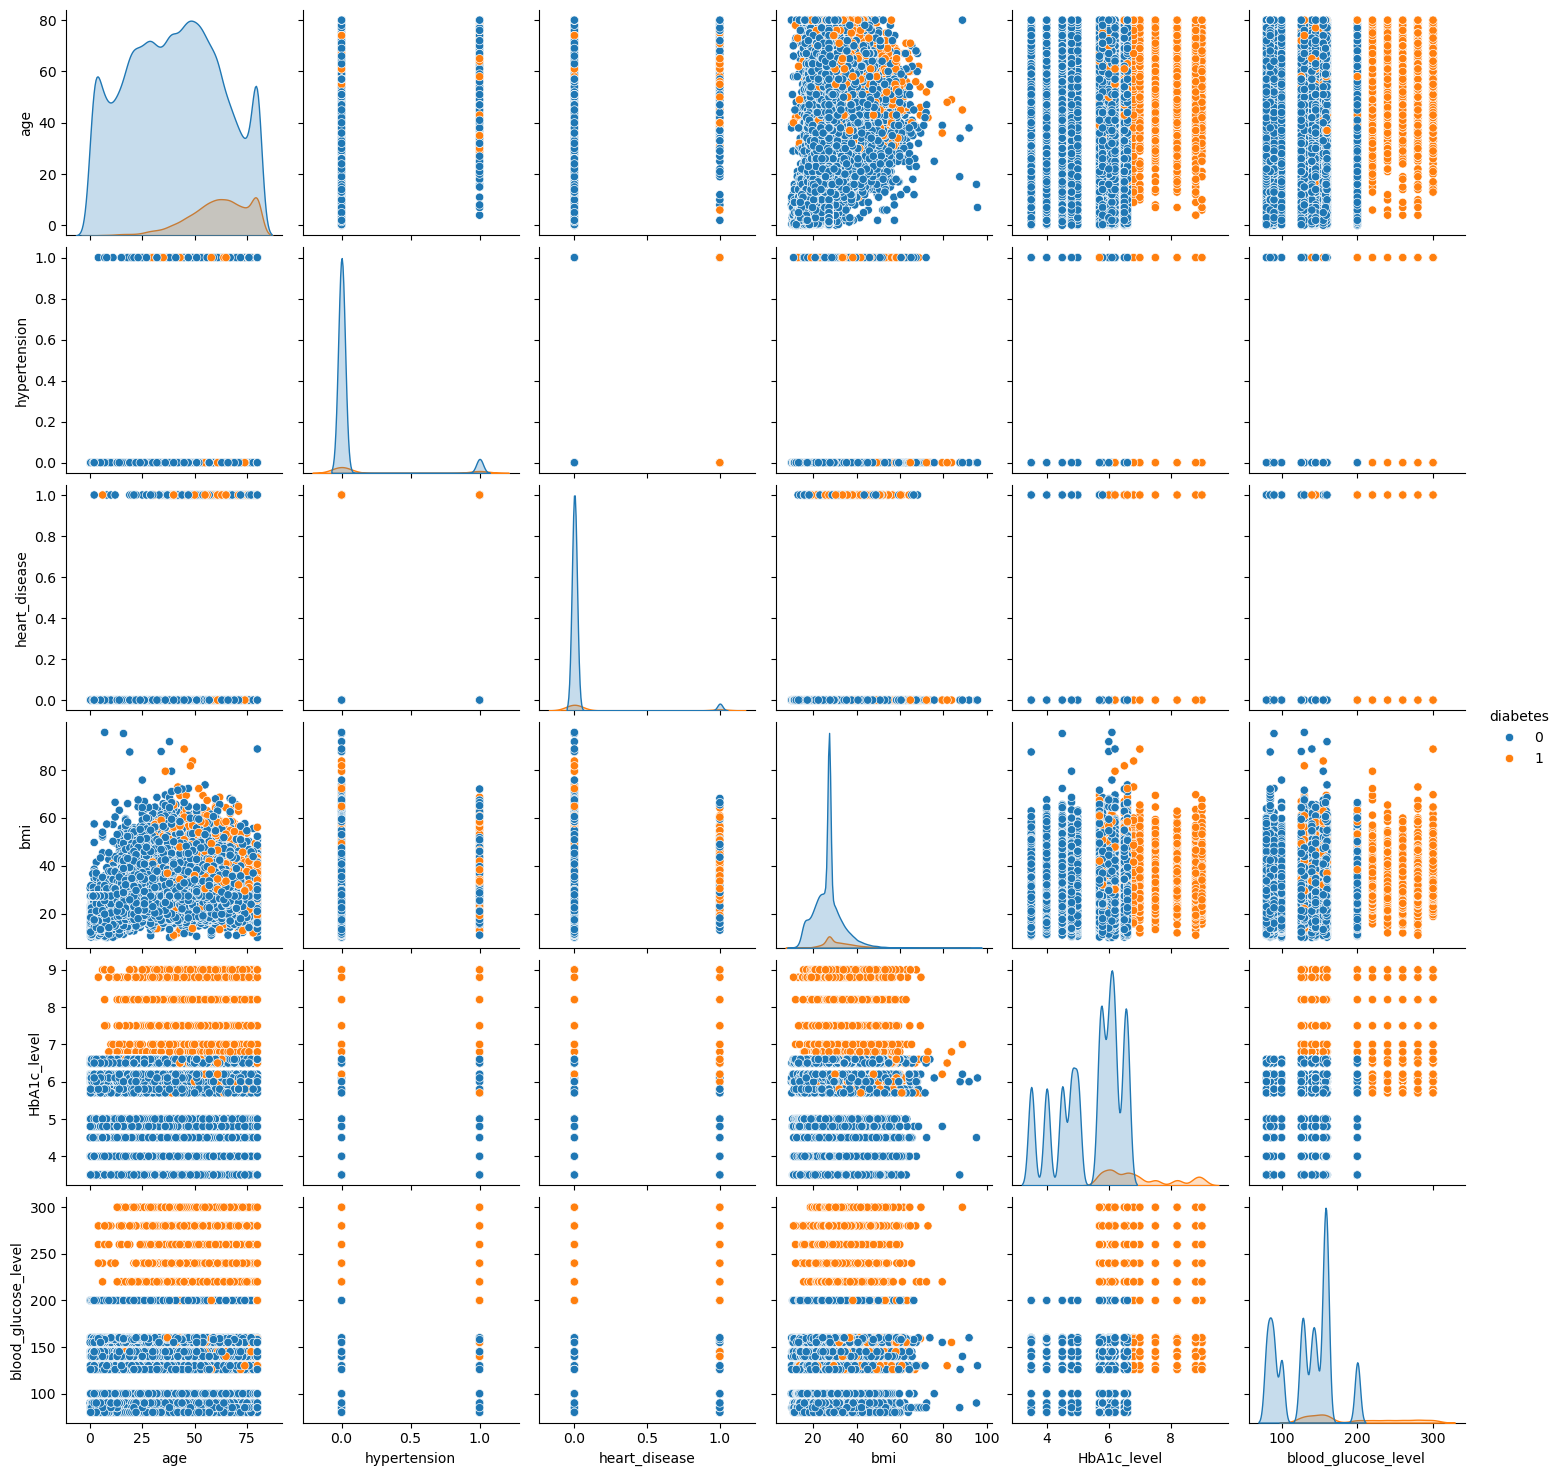

In [31]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Multivariate analysis</span></b> </div>

### <b>I <span style='color:#16C2D5'>|</span> Scatterplot Age vs BMI colored by Diabetes classification</b> 

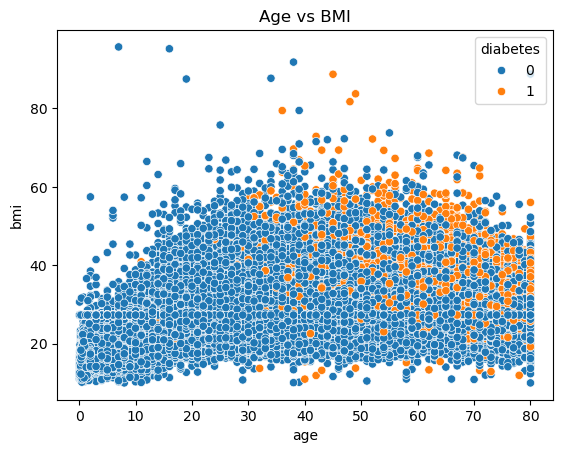

In [32]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

### <b>II <span style='color:#16C2D5'>|</span> Violin plot of BMI against diabetes classification split by gender</b> 

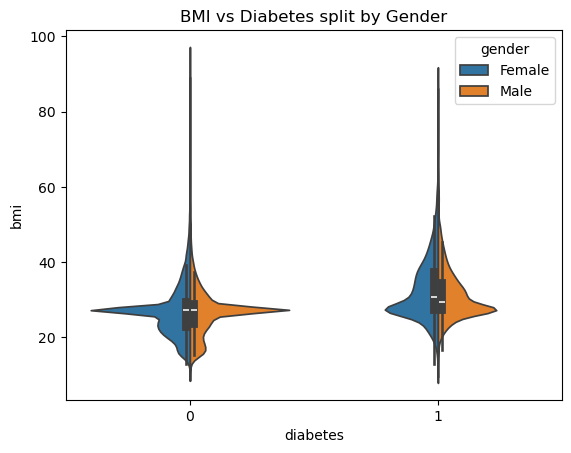

In [33]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

### <b>III <span style='color:#16C2D5'>|</span> Interaction between gender, BMI and diabetes</b> 

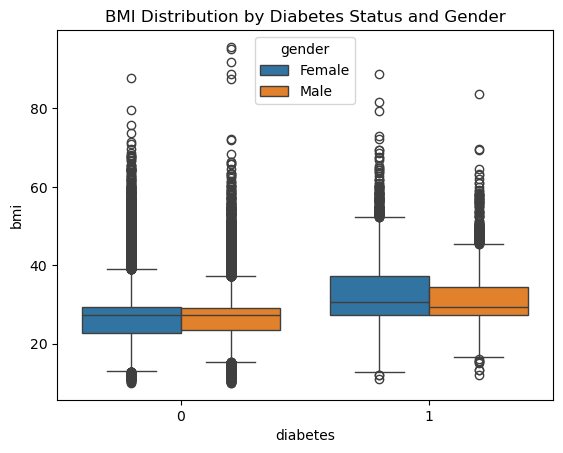

In [34]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Interaction between gender, Age and diabetes</b> 

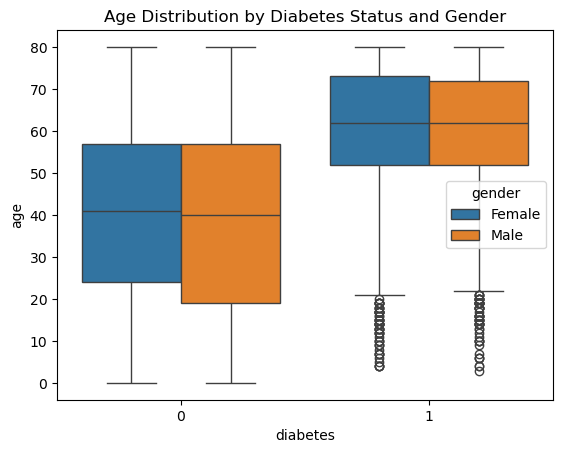

In [35]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()